In [22]:
#Cedrik Pearson, Kyle Chang
#CSE 163
#Final Project

#preliminary setup
!pip install geopandas
!pip install descartes

import geopandas as gpd
import pandas as pd
import math
import matplotlib.pyplot as plt

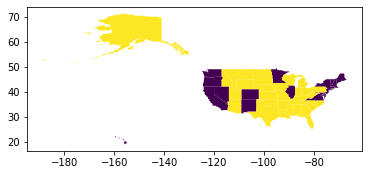

In [24]:
# load in twitter data
# we used our Tweepy scraper on two separate phrases, Black Lives Matter vs. All Lives Matter
# This returned 4 separate files, 2 for each phrase that we will now load in and join together

blm = pd.read_csv('assets/tweets_blm.csv')
blm1 = pd.read_csv('assets/tweets_blm2.csv')
alm = pd.read_csv('assets/tweets_alm.csv')
alm1 = pd.read_csv('assets/tweets_alm2.csv')

# This is our GeoJSON file containing states and whether or not they voted for Clinton or Trump in 2016
states = gpd.read_file('assets/us-states.geojson')
states.plot(column='election')

In [17]:
# combine the two datasets of the same keyword (our scraper only allowed for a max of 10 minute scrapes
# so this will be one alm vs one blm set both scraped for 20 minutes

blm_combined = pd.concat([blm, blm1])
alm_combined = pd.concat([alm, alm1])

,user,date,long,lat,content
0,coachyusef,Sun Jun 07 23:21:54 +0000 2020,-80.731882,28.313804,Fact.
1,tourguidethomas,Sun Jun 07 23:21:59 +0000 2020,-90.011008,29.982601,Y'all! Even Mittens is on board now. ALL LIVE...
2,cboyd304,Sun Jun 07 23:23:01 +0000 2020,-87.327733,41.585849,@druz3310 Yeah he's made something questionab...
3,TimFullerton,Sun Jun 07 23:23:14 +0000 2020,-73.948775,40.655138,ALL lives matter
4,rosePP916,Sun Jun 07 23:24:20 +0000 2020,-121.469664,38.561722,I know you hear people say “I don’t get it? a...
5,_ichristyn,Sun Jun 07 23:24:24 +0000 2020,-83.173867,32.678207,It’s crazy how a darkskin woman will uplift h...
6,DawnMaier3,Sun Jun 07 23:25:03 +0000 2020,-74.240032,40.417493,@Aisha_Joji ALL Lives Matter no mattwr your c...
7,so_sarahcastic,Sun Jun 07 23:26:21 +0000 2020,-83.173867,32.678207,why are y’all surprised? he’s not a shitty pe...
8,Shackelford1055,Sun Jun 07 23:27:01 +0000 2020,-80.087032,42.110703,"Are the people saying ""All Lives Matter"" even..."
9,jrhernandezd,Sun Jun 07 23:27:18 +0000 2020,-66.819494,10.421736,@hannah_natanson @MittRomney Of course all li...


In [ ]:
# now we want to spatially join the tweets to the map file

